In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
data = pd.read_json('mturk-pilot-interventions.json')
article = pd.read_json('Data.json')

In [3]:
data.head()

id  interventionSettings                        user  \
0   99  CONVERSATIONAL_AGENT  {'name': 'A3VP14XN3WUUOC'}   
1  100  CONVERSATIONAL_AGENT  {'name': 'A16X5FB3HAFCKN'}   
2  101       NO_INTERVENTION  {'name': 'A1RCVIJAS2Z3GC'}   
3  102   STATIC_INTERVENTION  {'name': 'A26399B1QZ7XJJ'}   
4  103   STATIC_INTERVENTION  {'name': 'A1N8TKTLXV92QR'}   

                                             article  validated userGuess  \
0  {'id': 29, 'title': 'Four years after divisive...      False      None   
1  {'id': 24, 'title': 'The Guardian view on the ...      False      None   
2  {'id': 24, 'title': 'The Guardian view on the ...      False      None   
3  {'id': 11, 'title': 'JAB PASS Brits may have t...      False      None   
4  {'id': 10, 'title': 'What are the pros and con...       True      HIGH   

  explanation  
0        None  
1        None  
2        None  
3        None  
4    rtgtgt3g

In [4]:
validated_count = data['validated'].value_counts()
validated_count

False    90
True     76
Name: validated, dtype: int64

<AxesSubplot:xlabel='validated', ylabel='count'>

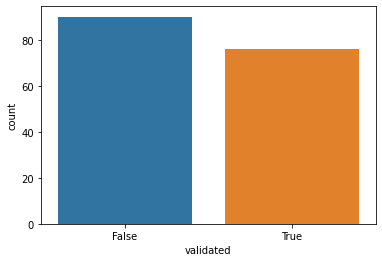

In [5]:
sns.countplot(x='validated', data=data)

In [6]:
validated = data[data['validated'] == True]
print(validated.count())
validated_with_answer = validated[validated['userGuess'].notnull()]
print(validated_with_answer.count())

id                      76
interventionSettings    76
user                    76
article                 76
validated               76
userGuess               63
explanation             63
dtype: int64
id                      63
interventionSettings    63
user                    63
article                 63
validated               63
userGuess               63
explanation             63
dtype: int64


In [7]:
def getArticleLabel(article_value):
    return article_value['quality']
validated_with_answer['trueLabel'] = validated_with_answer['article'].apply(getArticleLabel)

<ipython-input-7-7fe97c7c0143>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validated_with_answer['trueLabel'] = validated_with_answer['article'].apply(getArticleLabel)


In [8]:
validated_with_answer['positive'] = (validated_with_answer['userGuess'] == validated_with_answer['trueLabel'])


<ipython-input-8-4a19fe5d0697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validated_with_answer['positive'] = (validated_with_answer['userGuess'] == validated_with_answer['trueLabel'])


In [9]:
validated_with_answer.head()

id interventionSettings                        user  \
4   103  STATIC_INTERVENTION  {'name': 'A1N8TKTLXV92QR'}   
6   105      NO_INTERVENTION  {'name': 'A3A3R002WFC7U3'}   
7   106      NO_INTERVENTION   {'name': 'AK5AFB4VLBCGK'}   
10  109  STATIC_INTERVENTION  {'name': 'A3TKUXUTDX6FBF'}   
13  112      NO_INTERVENTION   {'name': 'A9ZBEA4T2FNZ3'}   

                                              article  validated userGuess  \
4   {'id': 10, 'title': 'What are the pros and con...       True      HIGH   
6   {'id': 19, 'title': 'Brexit hits German export...       True      HIGH   
7   {'id': 13, 'title': 'As politicians squabble o...       True    MEDIUM   
10  {'id': 25, 'title': 'Brexit: What you need to ...       True    MEDIUM   
13  {'id': 12, 'title': 'UK foreign sec says Covid...       True      HIGH   

                                          explanation trueLabel  positive  
4                                            rtgtgt3g      HIGH      True  
6   There to i clear the news that why i want to g...      HIGH      True  
7             I feel this after reading this article.       LOW     False  
10  style is very formal they have to include some...      HIGH     False  
13   Most sites provide an indicator of prestige, ...       LOW     False

<AxesSubplot:xlabel='interventionSettings', ylabel='count'>

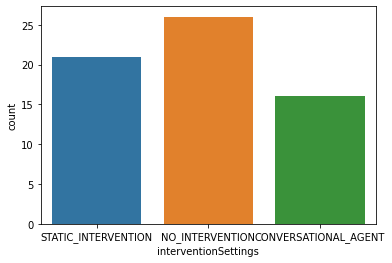

In [10]:
sns.countplot(x='interventionSettings', data=validated_with_answer)

In [11]:
no_intervention = validated_with_answer[validated_with_answer['interventionSettings']=='NO_INTERVENTION']
no_intervention = no_intervention.drop(['interventionSettings', 'validated'], axis=1)
print(no_intervention.count())
no_intervention.head()

id             26
user           26
article        26
userGuess      26
explanation    26
trueLabel      26
positive       26
dtype: int64


id                        user  \
6   105  {'name': 'A3A3R002WFC7U3'}   
7   106   {'name': 'AK5AFB4VLBCGK'}   
13  112   {'name': 'A9ZBEA4T2FNZ3'}   
15  115  {'name': 'A11CY37O9P73HW'}   
20  136  {'name': 'A1HEGV06SCZZHG'}   

                                              article userGuess  \
6   {'id': 19, 'title': 'Brexit hits German export...      HIGH   
7   {'id': 13, 'title': 'As politicians squabble o...    MEDIUM   
13  {'id': 12, 'title': 'UK foreign sec says Covid...      HIGH   
15  {'id': 30, 'title': 'Vote Leave's targeted Bre...      HIGH   
20  {'id': 10, 'title': 'What are the pros and con...       LOW   

                                          explanation trueLabel  positive  
6   There to i clear the news that why i want to g...      HIGH      True  
7             I feel this after reading this article.       LOW     False  
13   Most sites provide an indicator of prestige, ...       LOW     False  
15  It has high quality because it discusses every...    MEDIUM     False  
20            no details according to the topic given      HIGH     False

<AxesSubplot:xlabel='userGuess', ylabel='count'>

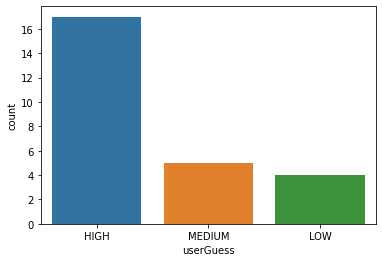

In [12]:
sns.countplot(x='userGuess', data=no_intervention)

<AxesSubplot:xlabel='trueLabel', ylabel='count'>

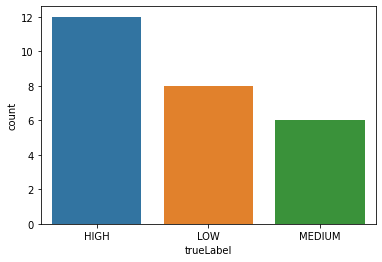

In [13]:
sns.countplot(x='trueLabel', data=no_intervention)

<AxesSubplot:xlabel='positive', ylabel='count'>

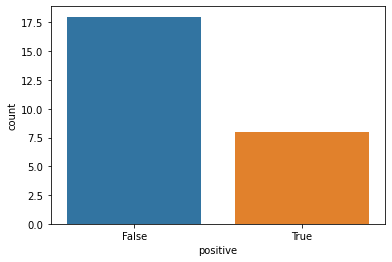

In [14]:
sns.countplot(x='positive', data=no_intervention)

In [15]:
static_intervention = validated_with_answer[validated_with_answer['interventionSettings']=='STATIC_INTERVENTION']
static_intervention = static_intervention.drop(['interventionSettings', 'validated'], axis=1)
print(static_intervention.count())
static_intervention.head()

id             21
user           21
article        21
userGuess      21
explanation    21
trueLabel      21
positive       21
dtype: int64


id                        user  \
4   103  {'name': 'A1N8TKTLXV92QR'}   
10  109  {'name': 'A3TKUXUTDX6FBF'}   
27  160  {'name': 'A3TX7UUGA2KAAB'}   
36  171  {'name': 'A13QVB627KKIPT'}   
39  174  {'name': 'A1GCPUVJUJ27HT'}   

                                              article userGuess  \
4   {'id': 10, 'title': 'What are the pros and con...      HIGH   
10  {'id': 25, 'title': 'Brexit: What you need to ...    MEDIUM   
27  {'id': 12, 'title': 'UK foreign sec says Covid...    MEDIUM   
36  {'id': 10, 'title': 'What are the pros and con...    MEDIUM   
39  {'id': 2, 'title': 'Sweden’s coronavirus gambl...    MEDIUM   

                                          explanation trueLabel  positive  
4                                            rtgtgt3g      HIGH      True  
10  style is very formal they have to include some...      HIGH     False  
27  it is the very social news updated in the arti...       LOW     False  
36                                           safe one      HIGH     False  
39  THEY NEED THEIR RIGHTS. BECAUSE IT IS A VERY B...      HIGH     False

<AxesSubplot:xlabel='userGuess', ylabel='count'>

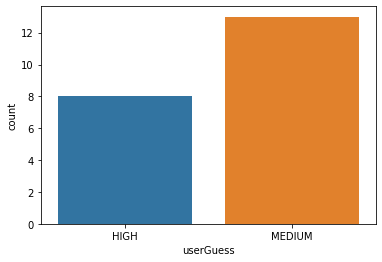

In [16]:
sns.countplot(x='userGuess', data=static_intervention)

<AxesSubplot:xlabel='trueLabel', ylabel='count'>

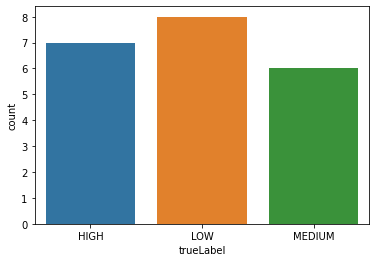

In [17]:
sns.countplot(x='trueLabel', data=static_intervention)

<AxesSubplot:xlabel='positive', ylabel='count'>

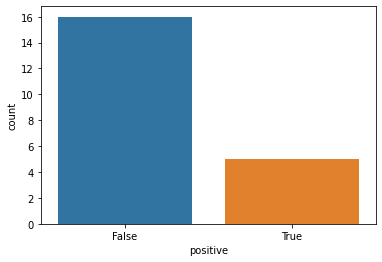

In [18]:
sns.countplot(x='positive', data=static_intervention)

In [19]:
conversational_agent = validated_with_answer[validated_with_answer['interventionSettings']=='CONVERSATIONAL_AGENT']
conversational_agent = conversational_agent.drop(['interventionSettings', 'validated'], axis=1)
print(conversational_agent.count())
conversational_agent.head()

id             16
user           16
article        16
userGuess      16
explanation    16
trueLabel      16
positive       16
dtype: int64


id                        user  \
16  128  {'name': 'A26KX5PGHY4FZJ'}   
45  200   {'name': 'AHMJHIEADMGYT'}   
48  217  {'name': 'A1TW60NCALLP12'}   
66  287   {'name': 'AE1A69PS9RKC4'}   
67  288  {'name': 'A3AB866JYLTERS'}   

                                              article userGuess  \
16  {'id': 23, 'title': 'Oxford-AstraZeneca Covid-...      HIGH   
45  {'id': 23, 'title': 'Oxford-AstraZeneca Covid-...      HIGH   
48  {'id': 3, 'title': 'The Swedish experiment', '...      HIGH   
66  {'id': 28, 'title': 'UK: Hate crime ‘at record...      HIGH   
67  {'id': 21, 'title': 'DOING IT FOR THE KIDS Oxf...      HIGH   

                                          explanation trueLabel  positive  
16  decent article, good language , not too long a...    MEDIUM     False  
45    this article is very clear and  neat appearance    MEDIUM     False  
48  The author use formal language and not unneces...      HIGH      True  
66                                     it is sensible    MEDIUM     False  
67  IT IS VERY GOOD AND USEFUL ARTICLE.IT IS HELP ...       LOW     False

<AxesSubplot:xlabel='userGuess', ylabel='count'>

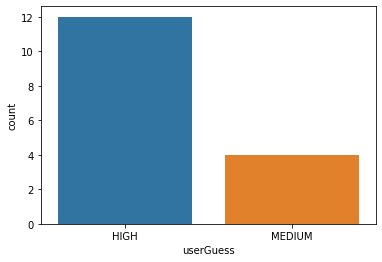

In [20]:
sns.countplot(x='userGuess', data=conversational_agent)

<AxesSubplot:xlabel='trueLabel', ylabel='count'>

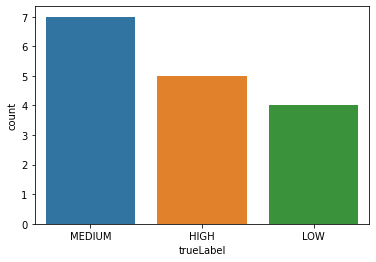

In [21]:
sns.countplot(x='trueLabel', data=conversational_agent)

<AxesSubplot:xlabel='positive', ylabel='count'>

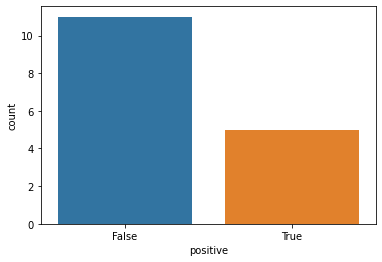

In [22]:
sns.countplot(x='positive', data=conversational_agent)

In [23]:
no_int_acc = no_intervention['positive'].sum()/no_intervention['positive'].count()
stat_int_acc = static_intervention['positive'].sum()/static_intervention['positive'].count()
con_agent_acc = conversational_agent['positive'].sum()/conversational_agent['positive'].count()
no_int_acc, stat_int_acc, con_agent_acc

(0.3076923076923077, 0.23809523809523808, 0.3125)

In [24]:
no_int_expl_mean = no_intervention['explanation'].apply(len).mean()
stat_int_expl_mean = static_intervention['explanation'].apply(len).mean()
con_agent_expl_mean = conversational_agent['explanation'].apply(len).mean()
no_int_expl_mean, stat_int_expl_mean, con_agent_expl_mean

(72.46153846153847, 55.333333333333336, 82.375)